In [16]:
import numpy as np
class Perceptron(object):
    """
    Perceptron classfier
    Parameters
    eta : float 
        learning rate between 0 and 1
    n_iter: int
        passes over training dataset
    random_state:int
        random number generator seed for random weight initialization
    Attributes:
    w_: 1d_array
        weight after fitting 
        p.s. w_[0] is the bias
    errors_:list
        number of misclassification in each epoch
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """
        X: array-like shape = [n_samples, n_features]
        Y: array-like shape = [n_labels]
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []
         for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    """
    What if the weights are initialized to zero?
        f(x) = int(x > 0)
        yh = f(wt * x) = f(0)
        update = eta * target
        w = [update] * n 
        After n_iters range, w = [k] * n. As we can see, the dimension of w is 1, which is called that eta only changes the scale but does 
        not change the direction. Besides, thr weights should not initialized to the same value for the same reason.
    """

IndentationError: unexpected indent (<ipython-input-16-04ab01bbe3e8>, line 31)

In [17]:
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


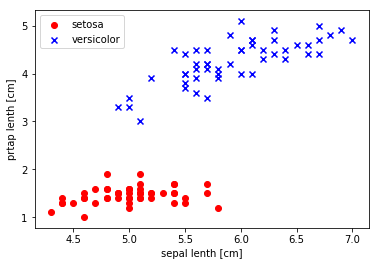

In [18]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0: 100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1],
            color = 'red', marker = 'o', 
            label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], 
            color = 'blue', marker = 'x',
            label = 'versicolor')

plt.xlabel('sepal lenth [cm]')
plt.ylabel('prtap lenth [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [19]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('Numer of updates')
plt.show()

NameError: name 'Perceptron' is not defined

In [9]:
ppn.w_

NameError: name 'ppn' is not defined

In [10]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


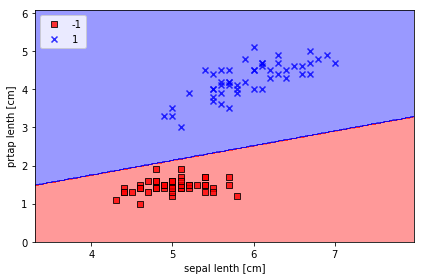

In [119]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal lenth [cm]')
plt.ylabel('prtap lenth [cm]')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [24]:
class AdalineGD(object):
    """
    Parameters:
    eta: float
        learning rate between 0 and 1
    n_iter: int
        passes over the training dataset
    random_state:
        random number generator seed for random weight
    
    Attribute
    w_: 1d array
        weight after fitting
    cost_:list
        sum of squares cost function value in each epoch
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >=0.0, 1, -1)

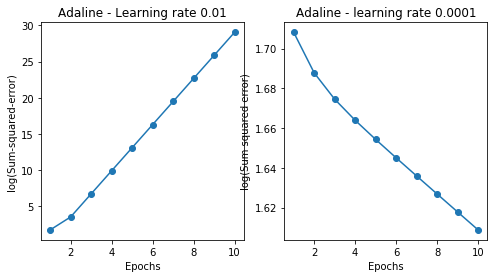

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')


ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
          np.log10(ada2.cost_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum squared error)')
ax[1].set_title('Adaline - learning rate 0.0001')

plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


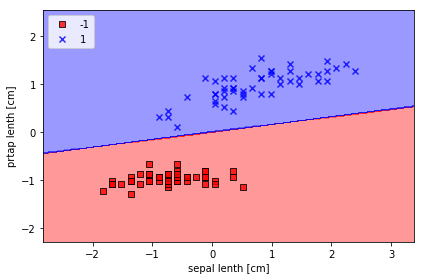

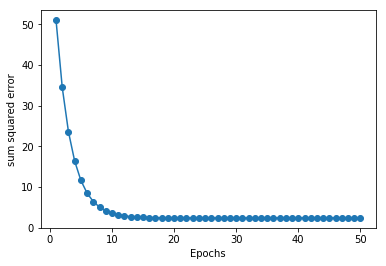

In [26]:
X_std = np.copy(X)
X_std [:,0] = (X_std[:,0] - X_std[:,0].mean())/X_std[:,0].std()
X_std [:,1] = (X_std[:,1] - X_std[:,1].mean())/X_std[:,1].std()

ada = AdalineGD(n_iter = 50, eta = 0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier = ada)
plt.xlabel('sepal lenth [cm]')
plt.ylabel('prtap lenth [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_ ) + 1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('sum squared error')
plt.show()

In [31]:
class AdalineSGD(object):
    def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.shuffle = shuffle
        self.w_initialized = False
    
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/ len(y) 
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = target - output
        self.w_[1:] +=self.eta*xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5*error**2
        return cost
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    """
    the differences between BGD and SGD is the ferequency of refreshing w_
    BGD: refresh the w_ after calculating the whole X, the frequency is n_iter
    SGD: refresh the w_ after calculating one xi, the frequency is n_iter * n_samples
    
    
    
    Question:
    why does it shuffle the data in SGD?
    """

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


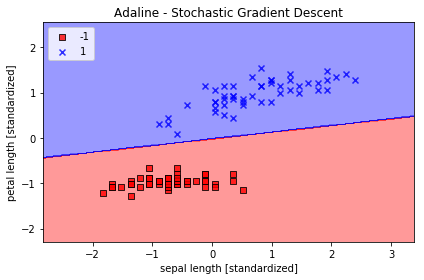

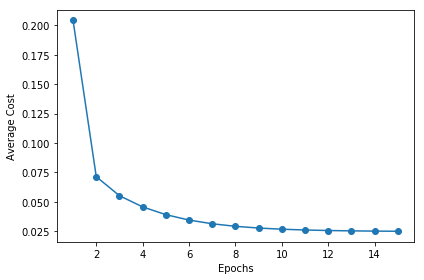

In [32]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./adaline_4.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('./adaline_5.png', dpi=300)
plt.show()